# Assignment 2: Network and semantic analysis of rappers in the USA

In this assignment we use network theory and NLP to analyze rappers split over the west and east coast of the USA. For the analysis, we use the content of the rappers' wikipedia pages and the links between them.

The set of rappers is determined by the two category pages for west coast and east coast hip hop artists on wikipedia: 

- https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
- https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

The first step of the assignemt is the gathering of data and the building of the network.

## Part 0: Building the network

First step of building the network is fetching the names of the rappers in the two categories. For this, we have decided to fetch the names from the category pages on wikipedia themselves. This strategy has the advantages of being: 

- *Dynamic and up-to-date*: As the content of the wikipedia pages regularily gets updated. 
- *Clean*: As the names from the wikipedia pages are retrieved directly from the html, we can be sure that the names do not need cleaning to be used later in the retrieval of wikipedia pages through the wikipedia API.

The method for retrieving the names from the category pages is done by fetching the html code for the category pages, using a regular expression to find the links that are not 1. anchor links or 2. special links and then saving the hyperlinks as the names of the rappers.

The regular expression used to find the links is the following: 

<div style="text-align: center">

`href="/wiki/([^:#"]+)"`

</div>

It is constructed as follows:

- `href="/wiki/`: The literal part of the regular expression is used to match links pointing to Wikipedia pages.
- `(`and `)`: The capturing paranthese are used to capture the part of the url after `/wiki/`.
- `[^:#"]+`: The main capturing pattern is used to match the page name but avoids URLs with colons, hashes, or double quotes. This ensures it doesn't capture anchor links or special Wikipedia namespace links.
- `"`: The `"` is used to match the end of the link.

The regular expression is used to find the hyperlink reference of the rappers. For both the east and west coast category pages, the first respectively 17 and 15 links are not rappers, and are hence removed from the list before storing. 

The code for fetching the names of the rappers is shown in the Appendix. 


## Part 1: Network visualization and basic stats

Before we start the analysis, we construct the graph as explained in the previous part.

In [2]:
import networkx as nx
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:

# Get the list of rapper names from rapperEast.txt
eastNames = []
with open('rappersEast.txt', 'r') as f:
    for line in f:
        eastNames.append(line.strip())

# Get the list of rapper names from rapperWest.txt
westNames = []
with open('rappersWest.txt', 'r') as f:
    for line in f:
        westNames.append(line.strip())

#Create a graph
G = nx.DiGraph()

G.add_node(eastNames[0])

for name in eastNames:
    text = open('htmlEast/' + name + '.txt', 'r')
    text = text.read()
    G.add_node(name, attr_coast = 'east', attr_length = len(text), color='red')
    wikiLinks = re.findall('href="/wiki/([^:#"]+)"', text)
    for link in wikiLinks:
        #skip if the link is to itself
        if link == name:
            continue
        if link in eastNames:
            G.add_edge(name, link)
        if link in westNames:
            G.add_edge(name, link)

for name in westNames:
    text = open('htmlWest/' + name + '.txt', 'r')
    text = text.read()
    G.add_node(name, attr_coast = 'west', attr_length = len(text), color='green')
    wikiLinks = re.findall('href="/wiki/([^:#"]+)"', text)
    for link in wikiLinks:
        #skip if the link is to itself
        if link == name:
            continue
        if link in eastNames:
            G.add_edge(name, link)
        if link in westNames:
            G.add_edge(name, link)

# Find the largest weakly connected component
largest_weakly_cc = max(nx.weakly_connected_components(G), key=len)

# Create a subgraph of G consisting only of the nodes in the largest weakly connected component
G = G.subgraph(largest_weakly_cc)


In [4]:
print("Number of east coast rappers", len(eastNames))
print("Number of west coast rappers", len(westNames))
print("Number of nodes: ",len(nx.nodes(G)))
print("Numebr of edges: ",len(nx.edges(G)))

Number of east coast rappers 450
Number of west coast rappers 354
Number of nodes:  745
Numebr of edges:  6263


- The network contains 745 nodes and 6263 edges. Nodes are the rappers and the edges are the links between the rappers' wikipedia pages.

In [5]:
## Finding the top connected rappers
# First we find the top 5 rappers with the most in-degree connections
in_degrees = G.in_degree()
in_degrees = sorted(in_degrees, key=lambda x: x[1], reverse=True)
print("Top 5 rappers with the most in-degree connections")
for i in range(5):
    print(in_degrees[i])

Top 5 rappers with the most in-degree connections
('Jay-Z', 128)
('Snoop_Dogg', 127)
('50_Cent', 103)
('Nas', 98)
('Kendrick_Lamar', 89)


- As it can be seen in the print statement above, the most connected rapper with in-degree is Jay-Z with 128 in-edges. Second place is Snoop Dogg with 127 edges. Thereafter we have 50 Cent, Lil Nas and Kendrick Lamar in the top 5. This result is expected, as Jay-Z and Snoop Dogg are two of the most famous rappers in the world.

In [6]:
## Finding the top connected rappers 
# We find the top 5 rappers with the most out-degree connections
out_degrees = G.out_degree()
out_degrees = sorted(out_degrees, key=lambda x: x[1], reverse=True)
print("Top 5 rappers with the most out-degree connections")
for i in range(5):
    print(out_degrees[i])

Top 5 rappers with the most out-degree connections
('Drag-On', 53)
('Kendrick_Lamar', 50)
('Jay-Z', 47)
('Dr._Dre', 45)
('50_Cent', 42)


- The most connected rapper with out-degree is Drag-On. This is unexpected, as Drag-On is not a very famous rapper. On his Wikipedia page, we can see that there is a list of guest appearences where Drag-On performed with other rappers. This is the reason why Drag-On has so many out-edges. Kendrick Lamar, Jay-Z, Dr. Dre and 50 Cent follow in the top 5 list. This is expected as they are very famous rappers.

Now we analyze the top-connected rappers in their respective coasts. We start with the East coast.

In [7]:
## Finding the top connected (in-degree) East coast rappers
# We find the top 5 rappers with the most in-degree connections
east_in_degrees = G.in_degree(eastNames)
east_in_degrees = sorted(east_in_degrees, key=lambda x: x[1], reverse=True)
print("Top 5 East coast rappers with the most in-degree connections")
for i in range(5):
    print(east_in_degrees[i])

Top 5 East coast rappers with the most in-degree connections
('Jay-Z', 128)
('50_Cent', 103)
('Nas', 98)
('Busta_Rhymes', 89)
('Wiz_Khalifa', 72)


- Most in-degree connected rapper in the __East__ coast is Jay-Z with 128 in-edges. 50 Cent follows with 103 edges, Lil Nas with 98, Busta Ryhmes with 89 and Wiz Khalifa with 72.  

In [8]:
## Finding the top connected (out-degree) East coast rappers
# We find the top 5 rappers with the most out-degree connections
east_out_degrees = G.out_degree(eastNames)
east_out_degrees = sorted(east_out_degrees, key=lambda x: x[1], reverse=True)
print("Top 5 East coast rappers with the most out-degree connections")
for i in range(5):
    print(east_out_degrees[i])

Top 5 East coast rappers with the most out-degree connections
('Drag-On', 53)
('Jay-Z', 47)
('50_Cent', 42)
('Black_Thought', 42)
('Nas', 37)


- Most out-degree connected rapper in the __East__ coast is Drag-On with 53 degrees. Jay-Z (47), 50 Cent (42), Black Thought (42) and Lil Nas (37) follow in the top 5.

In [9]:
## Finding the top connected (in-degree) West coast rappers
# We find the top 5 rappers with the most in-degree connections
west_in_degrees = G.in_degree(westNames)
west_in_degrees = sorted(west_in_degrees, key=lambda x: x[1], reverse=True)
print("Top 5 West coast rappers with the most in-degree connections")
for i in range(5):
    print(west_in_degrees[i])

Top 5 West coast rappers with the most in-degree connections
('Snoop_Dogg', 127)
('Kendrick_Lamar', 89)
('Dr._Dre', 88)
('Tupac_Shakur', 71)
('E-40', 66)


- Most in-degree connected rapper in the __West__ coast is Snoop Dog with 127 in-edges. Kendrick Lamar (89), Dr. Dre(88), Tupac Shakur (71) and E-40 (66) follow in the top 5.

In [10]:
## Finding the top connected (out-degree) West coast rappers
# We find the top 5 rappers with the most out-degree connections
west_out_degrees = G.out_degree(westNames)
west_out_degrees = sorted(west_out_degrees, key=lambda x: x[1], reverse=True)
print("Top 5 West coast rappers with the most out-degree connections")
for i in range(5):
    print(west_out_degrees[i])

Top 5 West coast rappers with the most out-degree connections
('Kendrick_Lamar', 50)
('Dr._Dre', 45)
('DJ_Dahi', 38)
('The_Game_(rapper)', 38)
('Kurupt', 37)


- Most out-degree connected rapper in the __West__ coast is Kendrick Lamar with 50 out-edges. Dr. Dre, DJ Dahi, The Game and Kurupt follow in the top 5. 

Now, we plot the in- and out-degree distributions for the whole network.

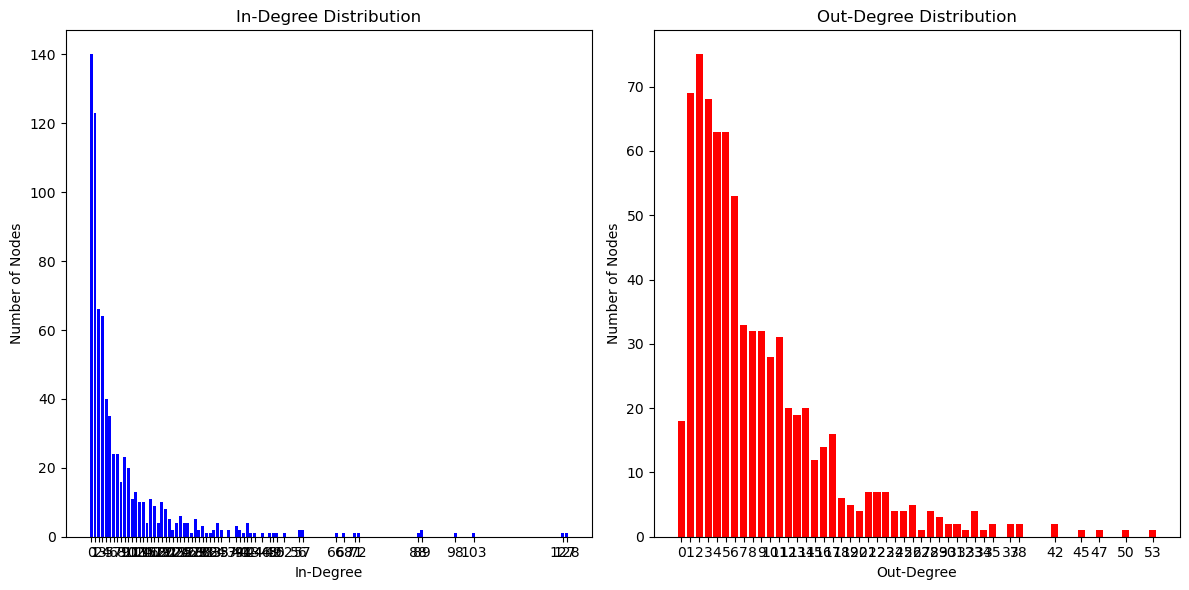

In [11]:
# Calculate in-degrees and out-degrees for each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Group nodes by their in-degrees
in_degree_values = sorted(set(in_degrees.values()))
in_degree_histogram = [list(in_degrees.values()).count(i) for i in in_degree_values]

# Group nodes by their out-degrees
out_degree_values = sorted(set(out_degrees.values()))
out_degree_histogram = [list(out_degrees.values()).count(i) for i in out_degree_values]

# Plot the in-degree distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(in_degree_values, in_degree_histogram, width=0.80, color='b')
plt.title("In-Degree Distribution")
plt.ylabel("Number of Nodes")
plt.xlabel("In-Degree")
plt.xticks([i for i in in_degree_values if i % 1 == 0])  # Display x-ticks for integer degree values

# Plot the out-degree distribution
plt.subplot(1, 2, 2)
plt.bar(out_degree_values, out_degree_histogram, width=0.80, color='r')
plt.title("Out-Degree Distribution")
plt.ylabel("Number of Nodes")
plt.xlabel("Out-Degree")
plt.xticks([i for i in out_degree_values if i % 1 == 0])  # Display x-ticks for integer degree values

plt.tight_layout()
plt.show()


- The x-axis shows the in and out degrees, and the y-axis shows the number of nodes with that degree. The in-degree distribution is shown in blue and the out-degree distribution is shown in red. 
- The two graphs look slightly different from each other. The in-degree distribution is more skewed to the left than the out-degree distribution. Which shows theat there are many nodes with low in-degree and fewer nodes with high in-degree. The out-degree distribution is still skewed to left, but not as much as in the in-degree distribution. It is slightly more evenly distributed. This also shows that there are some hubs in the network, which have many in- and out-edges that connects the nodes. We expect the hubs to be the most popular rappers, which is also the case as we observed when we printed the top 5 most connected rappers. 

Now we find the exponent of the in- and out-degree diistributions using ```powerlaw```.

In [12]:
import powerlaw

# Calculate in-degrees, out-degrees, and total degrees
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]
total_degrees = [d for n, d in G.degree()]

# Fit powerlaw
in_alpha = powerlaw.Fit(in_degrees).alpha
out_alpha = powerlaw.Fit(out_degrees).alpha
total_degrees_alpha = powerlaw.Fit(total_degrees).alpha

print("In-degree exponent: ", in_alpha)
print("Out-degree exponent: ", out_alpha)
print("Total degree exponent: ", total_degrees_alpha)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
In-degree exponent:  2.734166488193077
Out-degree exponent:  3.2674371723064572
Total degree exponent:  3.2559788338392193


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


 - The rappers network follows a power-law distribution with exponents:
    - In-Degree Exponent (α=2.734): Indicates the presence of influential hubs with many incoming connections.
    -  Out-Degree Exponent (α=3.267): Suggests a more evenly distributed outgoing connection pattern.
    - Total Degree Exponent (α=3.256): Reflects the combined influence of both incoming and outgoing connections.
- The rappers network is scale-free, with a few highly connected nodes dominating the in-degree distribution indicating the existence of hubs.

The results are matching with what we have observed in the plots previously.

Now we create a random netwrok with the same number of nodes, calculating average degree and _p_. 

At the same time we also calculate the in+out degrees for the rappers network, and then plot the degree distribution for the two networks next to each other to make the analysis easier.

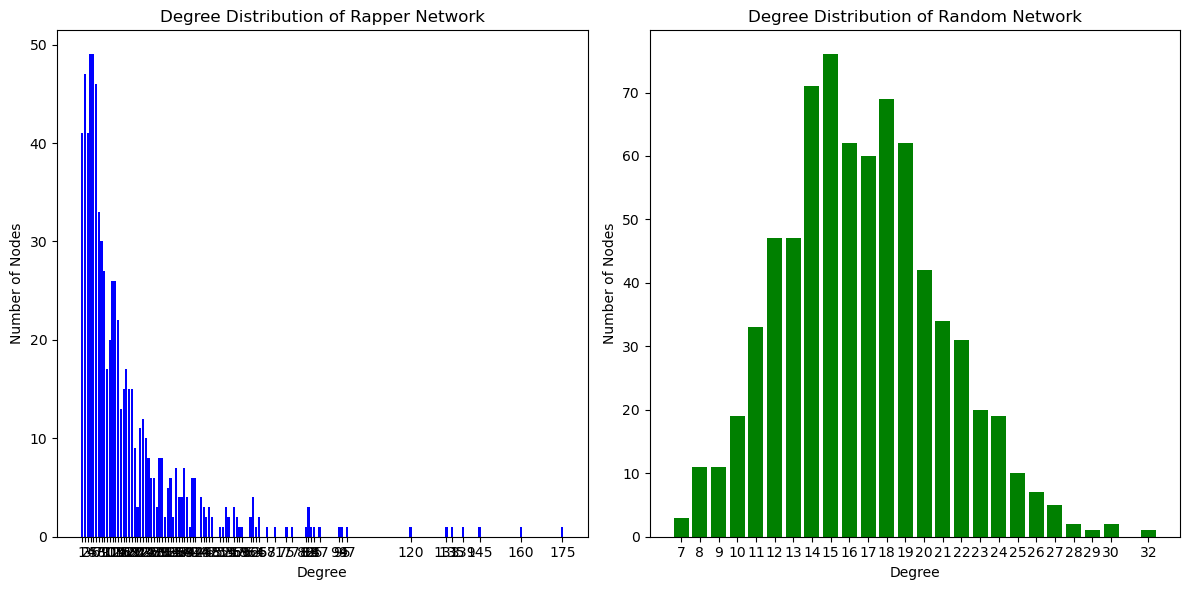

In [13]:
import matplotlib.pyplot as plt

# Calculating the values
N = G.number_of_nodes()
avg_degree = sum(dict(G.degree()).values()) / N
p = avg_degree / (N - 1)

# Generating the random graph
random_graph = nx.erdos_renyi_graph(N, p)
degrees_random = [degree for node, degree in random_graph.degree()]
values_random = sorted(set(degrees_random))
histogram_random = [degrees_random.count(i) for i in values_random]

# Total degrees for the rapper network
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]
total_degrees = [in_d + out_d for in_d, out_d in zip(in_degrees, out_degrees)]
values_total = sorted(set(total_degrees))
histogram_total = [total_degrees.count(i) for i in values_total]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the rapper network
axes[0].bar(values_total, histogram_total, width=0.80, color='b')
axes[0].set_title("Degree Distribution of Rapper Network")
axes[0].set_ylabel("Number of Nodes")
axes[0].set_xlabel("Degree")
axes[0].set_xticks([i for i in values_total if i % 1 == 0])  # Display x-ticks for integer degree values

# Plot for the random network
axes[1].bar(values_random, histogram_random, width=0.80, color='g')
axes[1].set_title("Degree Distribution of Random Network")
axes[1].set_ylabel("Number of Nodes")
axes[1].set_xlabel("Degree")
axes[1].set_xticks([i for i in values_random if i % 1 == 0])  # Display x-ticks for integer degree values

plt.tight_layout()
plt.show()

- We can see that in the rapper network, the degree distribution is more skewed to the left than in the random network. This is because the rapper network has some hubs, which have many in- and out-edges. The random network is more evenly distributed, which is expected as it is a random netwek and the existence of the hubs is very unlikely.

Now it is time to visualize the rapper network. 

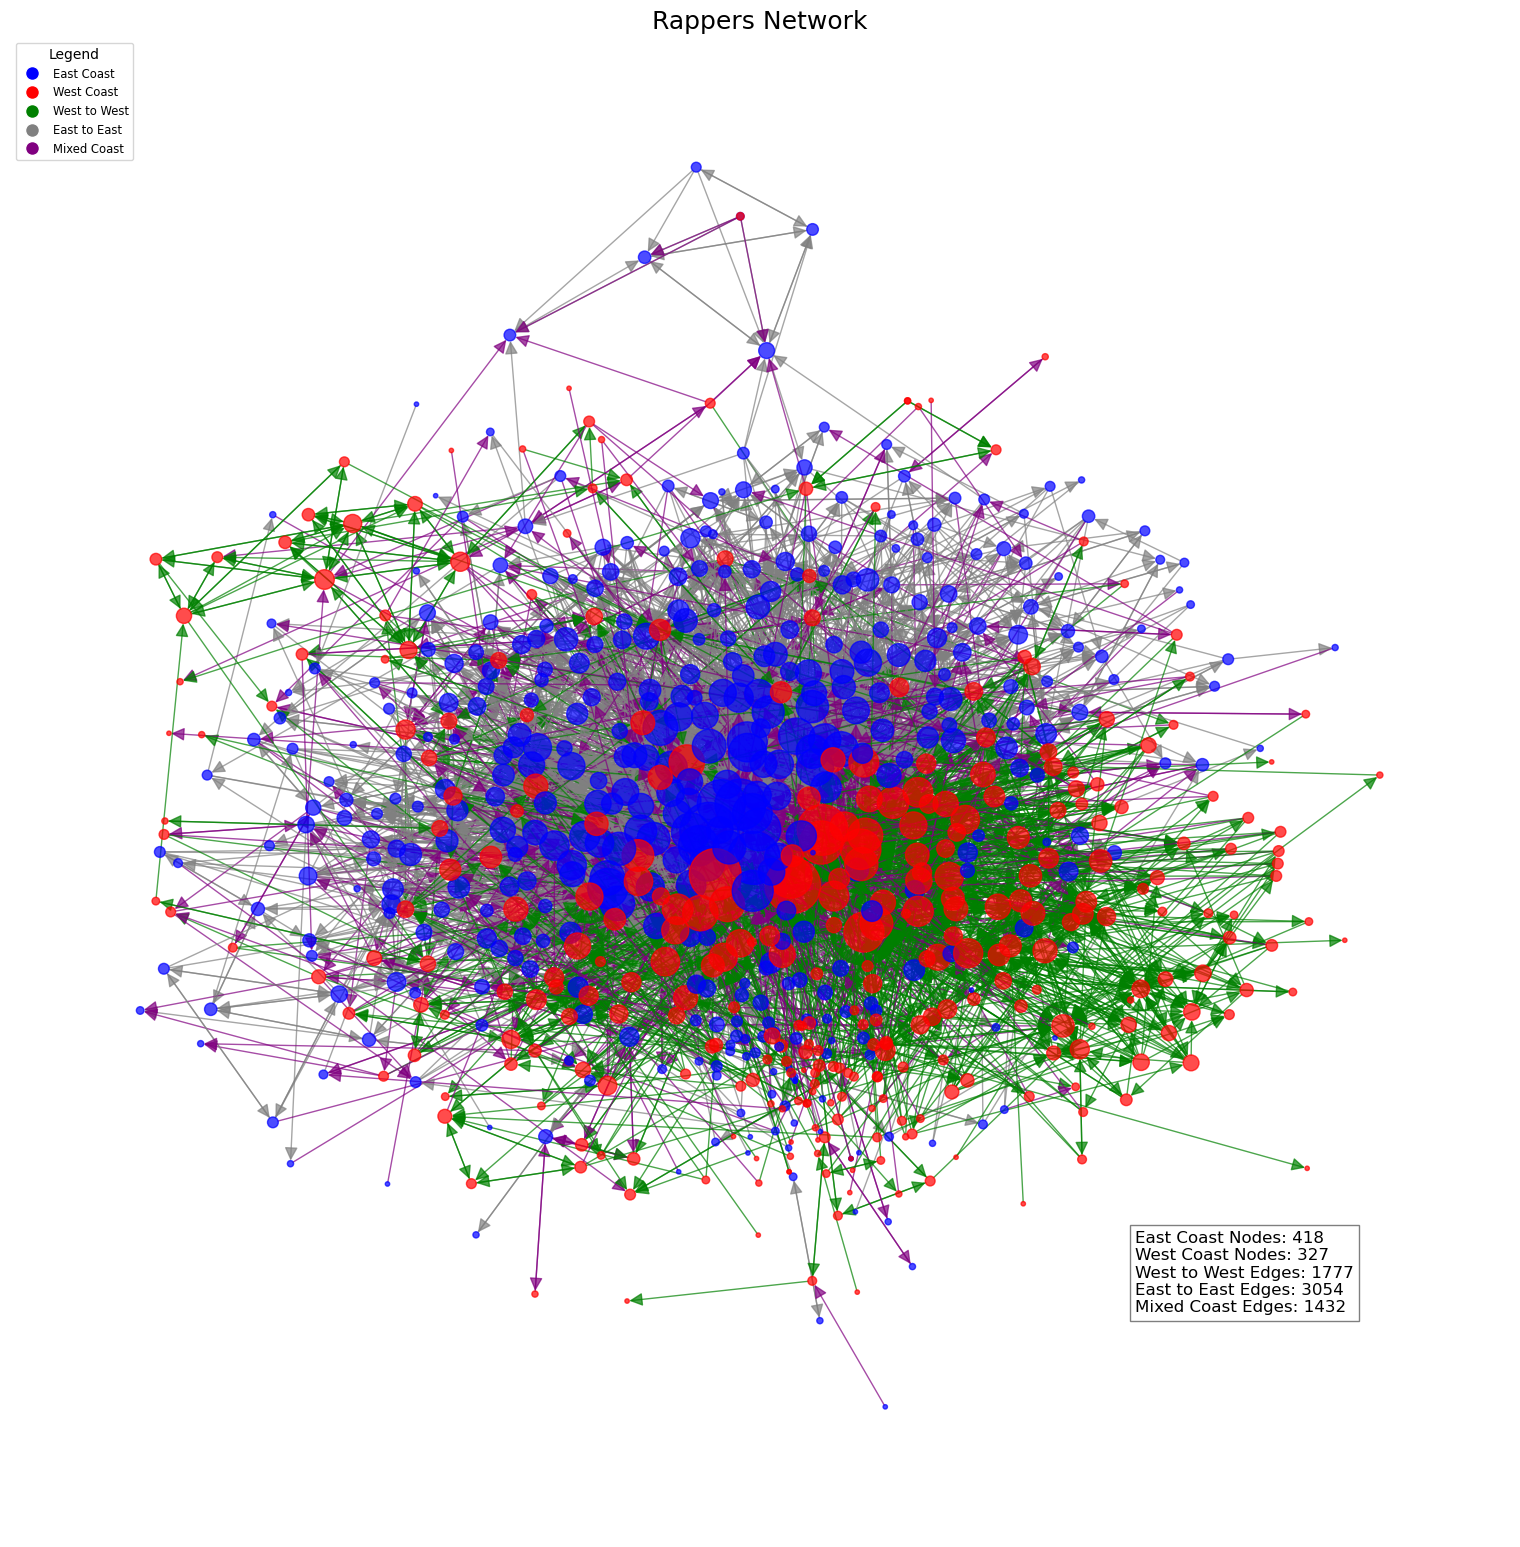

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate node sizes based on in-degrees + out-degrees
node_sizes = [(G.in_degree(node) + G.out_degree(node)) * 10 for node in G.nodes()]

# Map 'east' to 'blue' and 'west' to 'red' for node colors
node_colors = ['blue' if G.nodes[node]['attr_coast'] == 'east' else 'red' for node in G.nodes()]

# Set up edge colors based on coast attributes
edge_colors = []
for u, v in G.edges():
    if G.nodes[u]['attr_coast'] == 'west' and G.nodes[v]['attr_coast'] == 'west':
        edge_colors.append('green')
    elif G.nodes[u]['attr_coast'] == 'east' and G.nodes[v]['attr_coast'] == 'east':
        edge_colors.append('gray')
    else:
        edge_colors.append('purple')

# Count the number of nodes with each color
num_east_nodes = node_colors.count('blue')
num_west_nodes = node_colors.count('red')

# Count the number of edges with each color
num_green_edges = edge_colors.count('green')
num_gray_edges = edge_colors.count('gray')
num_purple_edges = edge_colors.count('purple')        

# Draw the graph using the Kamada-Kawai layout
plt.figure(figsize=(15, 15))
pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos=pos, node_color=node_colors, node_size=node_sizes, edge_color=edge_colors, with_labels=False, alpha=0.7, arrows=True, arrowsize=20)
# Add a legend
legend_labels = {'East Coast': 'blue', 'West Coast': 'red',
                 'West to West': 'green', 'East to East': 'gray', 'Mixed Coast': 'purple'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                  for label, color in legend_labels.items()]

plt.legend(handles=legend_handles, title='Legend', loc='upper left', fontsize='small')

# Background Color
plt.gca().set_facecolor('lightgray')

# Title
plt.title('Rappers Network', size=18)

# Statistics
stats = f"East Coast Nodes: {num_east_nodes}\nWest Coast Nodes: {num_west_nodes}\n" \
        f"West to West Edges: {num_green_edges}\nEast to East Edges: {num_gray_edges}\n" \
        f"Mixed Coast Edges: {num_purple_edges}"
plt.figtext(0.75, 0.15, stats, fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5})

plt.show()


- The rappers network visualization is shown above. Blue nodes indicate the East coast rappers, and the red nodes indicate the West coast rappers. The size of the nodes indicate the degree of the nodes. This was calculated by summing the in- and out-edges for each node. The bigger the node, the more connections it has. The positioning of the nodes is done by the inbuilt networkx layout Kamada-Kawai. There was made multiple tries with the positioning of the nodes, also with the Force-atlas algorithm, but this was the best one.
- If a connection is made from a west node to west node, it is colored with green. If it is east to east it is colored with gray. The edges between different coasts are colored with purple. 
- Then we have some statistics on the right bottom corner. We can see that there are more east to east edges which indicates that East coast rappers are more likely to collaborate with each other compared to the West coast rappers. This can also be caused by the fact that there are more East coast rappers in the network. We also see that there are a good amount of mixed coast edges, which indicates that the rappers from different coasts collaborate with each other, even though it is a lower number. 
- From the sizes of the nodes, we can see that there are some hubs, which can be called popular rappers. The popular rappers play an important role in connecting the rest of the rappers.

## Part 2: Word-clouds

In this part we will create a word-cloud for each coast according to the novel TF-TR method. 

**Step One: Text Preprocessing**

### Tokenization and Cleaning

The code tokenizes and cleans the text data by performing the following steps:

1. **Lowercasing:** Converts all tokens to lowercase.
2. **Punctuation Removal:** Strips out punctuation marks.
3. **Stopword Removal:** Removes common stopwords (e.g., 'the', 'and', 'in').
4. **Special Character Removal:** Removes specific characters such as '==' and '==='.

In [15]:
import nltk

#create a list of file namesst and order them alphabetically
file_list = sorted(os.listdir("textsWest"))
#create a rapper corpus from the file list
from nltk.corpus import PlaintextCorpusReader
corpus_root = "textsWest"
westrappers = PlaintextCorpusReader(corpus_root, file_list)

westrappers = nltk.Text(westrappers.words())

In [16]:
#create a list of file names file_list and order them alphabetically
file_list = sorted(os.listdir("textsEast"))

#create a rapper corpus from the file list
from nltk.corpus import PlaintextCorpusReader
corpus_root = "textsEast"
eastrappers = PlaintextCorpusReader(corpus_root, file_list)

eastrappers = nltk.Text(eastrappers.words())

Then we tokenize the text data from westrappers and eastrappers, extracting individual tokens (like words or punctuation) and storing them in westtokens and easttokens respectively.

In [17]:
#Tokenize westrappers and eastrappers
westtokens = westrappers.tokens
easttokens = eastrappers.tokens

In order to prepare the text data for analysis, the we perform a series of preprocessing steps on westtokens and easttokens. These steps include converting all text to lowercase for consistency, removing punctuation marks, filtering out common stopwords, and eliminating certain specific strings ('==' and '===') from the tokens.

In [18]:
import string
#Set everything to lower case
westtokens = [token.lower() for token in westtokens]
easttokens = [token.lower() for token in easttokens]

#Remove all punctuations from the tokens
westtokens = [token for token in westtokens if token not in string.punctuation]
easttokens = [token for token in easttokens if token not in string.punctuation]

#Remove all stopwords from the tokens
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
westtokens = [token for token in westtokens if token not in stopwords]
easttokens = [token for token in easttokens if token not in stopwords]

#Remove all '==' from the tokens
westtokens = [token for token in westtokens if token != '==']
easttokens = [token for token in easttokens if token != '==']

#Remove all '===' from the tokens
westtokens = [token for token in westtokens if token != '===']
easttokens = [token for token in easttokens if token != '===']

**Step Two: Word Weights**

### Calculating TF-TR

The code calculates Term Ratios (TR) to weigh each word's Term Frequency (TF), emphasizing words that characterize each coast's corpus. For a token $t$, the weights $w_{t}^{(w)}$ (West Coast) and $w_{t}^{(e)}$ (East Coast) are defined as:

$$w_{t}^{(w)} = \frac{\text{TF}^{(w)}_t}{\text{TF}^{(e)}_t + c}$$
$$w_{t}^{(e)} = \frac{\text{TF}^{(e)}_t}{\text{TF}^{(w)}_t + c}$$

The TF-TR value is then computed as:

$$\text{TF-TR}_t^{(u)} = \text{TF}^{(u)}_t \times w_{t}^{(u)}$$

In [19]:
from collections import Counter

# Create a frequency list of westtokens and easttokens
westtf = Counter(westtokens)
easttf = Counter(easttokens)

In [20]:
c = 1

# Calculate weights for each token
west_weights = {token: westtf[token] / (easttf.get(token, 0) + c) for token in westtf}
east_weights = {token: easttf[token] / (westtf.get(token, 0) + c) for token in easttf}

# Calculate TF-TR values for each token
west_tf_tr = {token: westtf[token] * west_weights[token] for token in westtf}
east_tf_tr = {token: easttf[token] * east_weights[token] for token in easttf}

**Step Three: Visualizing the TF-TR Values**

### Ranking and Visualization

The code ranks the tokens based on their computed TF-TR values and visualizes them using word clouds.

In [21]:
# Rank the tokens based on their TF-TR values
sorted_west_tf_tr = sorted(west_tf_tr.items(), key=lambda x: x[1], reverse=True)
sorted_east_tf_tr = sorted(east_tf_tr.items(), key=lambda x: x[1], reverse=True)

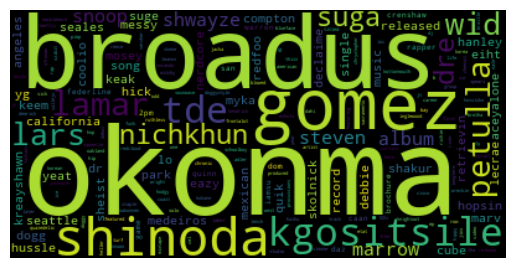

In [22]:
from wordcloud import WordCloud

#Add tokens to a string as as many times as their TF-TR value
west_string = ''
for token, tf_tr in sorted_west_tf_tr:
    west_string += (token + ' ') * int(tf_tr)

east_string = ''
for token, tf_tr in sorted_east_tf_tr:
    east_string += (token + ' ') * int(tf_tr)

#Create a wordcloud for west_string and east_string
west_wordcloud = WordCloud(collocations=False).generate(west_string)
east_wordcloud = WordCloud(collocations=False).generate(east_string)

#Plot the wordclouds
import matplotlib.pyplot as plt
plt.imshow(west_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



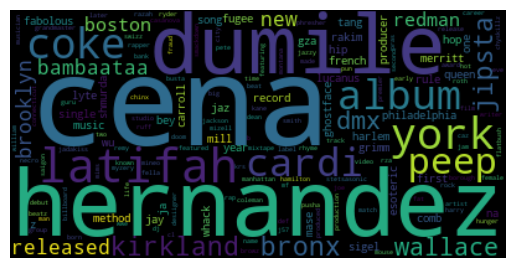

In [23]:
plt.imshow(east_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We print the top 5 words from each coast:

In [24]:
#Print the top 5 words from each coast
print("Top 5 words from West coast")
print(sorted_west_tf_tr[:5])
print("Top 5 words from East coast")
print(sorted_east_tf_tr[:5])

Top 5 words from West coast
[('okonma', 11236.0), ('broadus', 7056.0), ('gomez', 6561.0), ('shinoda', 5202.0), ('kgositsile', 4900.0)]
Top 5 words from East coast
[('cena', 15987.0), ('hernandez', 12324.5), ('dumile', 10201.0), ('latifah', 10082.0), ('york', 8679.03125)]


## Part 3: Communities

### Community Detection and Modularity

In the context of network analysis, as described in "Network Science" by Albert-László Barabási, **communities** are groups of nodes that are more densely connected internally than with the rest of the network. One of the metrics used to identify the presence of such communities is **modularity**.

#### Modularity

Modularity, denoted as \(M\), measures the difference between the actual link density in a community compared to what would be expected in a randomly wired network. A high modularity indicates a strong community structure. The formula to compute modularity is given by:

$$M = \sum_{c=1}^{n_c} \left[ \frac{L_c}{L} - \left( \frac{k_c}{2L} \right)^2 \right]$$ 

where $L_c$ is the total number of links within community $C_c$, $k_c$ is the total degree of the nodes in $C_c$, and $L$ is the total number of links in the entire network.


**Step One: Finding communities**

### Finding the best partition

We utilize the `community` module's 'best_partition' to find the optimal partition of the network into communities.
This uses the Louvain method, which is an algorithm that iteratively optimizes modularity, to partition the nodes into communities. 

In [25]:
Gu = G.to_undirected()

import community

#use best_partition() function from community to find the best partition for the west_nodes
best_partition = community.best_partition(Gu)
modularity = community.modularity(best_partition, Gu)

print("Modularity of the best partition of the network: ", modularity)

Modularity of the best partition of the network:  0.40739536639311086


**Step Two: Analyzing the communities**

### Plot the sizes of found communities

We can find the number of communities and their sizes, which we can plot in a histogram.

In [26]:
#Find number of communities
num_communities = len(set(best_partition.values()))
print("Number of communities: ", num_communities)

Number of communities:  9


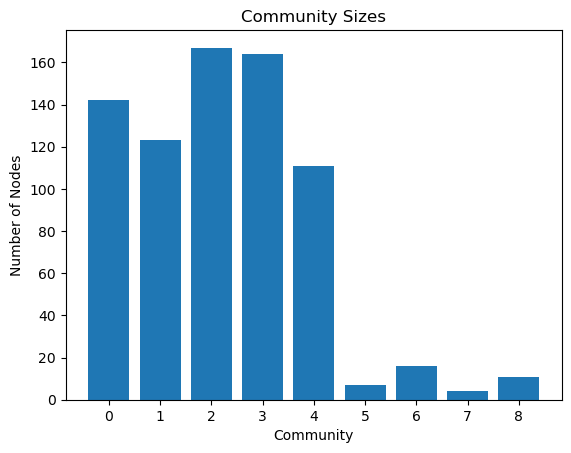

In [27]:
#Plot the community sizes
from collections import Counter

# Count the number of nodes in each community
community_sizes = Counter(best_partition.values())

# Create a list of community sizes, ensuring every community is represented
community_sizes_list = [community_sizes[i] if i in community_sizes else 0 for i in range(num_communities)]

# Plot the community sizes
plt.bar(range(num_communities), community_sizes_list)
plt.title("Community Sizes")
plt.xlabel("Community")
plt.ylabel("Number of Nodes")
plt.xticks(range(num_communities))  # Ensure every community number is shown on x-axis
plt.show()


**Step Three: Partition based on coasts**

### Moldularity of coast partition

We partition the rappers into two communities based on which coast they represent. Then we can find the modularity of this partition using the `community` module.

In [28]:
# Create a partition based on the coast attributes
coast_partition = {node: data['attr_coast'] for node, data in Gu.nodes(data=True)}

# Calculate the modularity of the coast partition
coast_modularity = community.modularity(coast_partition, Gu)

# Print the modularity of the coast partition
print("Modularity of the coast partition: ", coast_modularity)


Modularity of the coast partition:  0.2477955284773549


### Comparing Community Detection Approaches: Louvain Method vs. Coast Partitioning

Using the Louvain method, the network is partitioned into around 10 communities, resulting in a modularity of around 0.4. This suggests that the network structure has been efficiently partitioned into communities that are internally dense and externally sparse, leading to a relatively high modularity score.
On the other hand, partitioning the network based on geographical information (i.e., East Coast and West Coast) yields only two communities with a modularity of 0.25.

#### discussion
While the geographical partitioning is straight forward, it may oversimplify the community structure in the network. The modularity of 0.25 indicates that the network isn't as well-partitioned as it could be, suggesting there are more intricate relationships that a simple East-West division overlooks.

## Part 4: Sentiment of communities

In [29]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import PlaintextCorpusReader, stopwords
import os
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

save_path_east = 'wikisEast'
save_path_west = 'wikisWest'

raw_east = []
raw_west = []

# Retrieve all .txt files in /jsons folder and append them to raw_east
for file in os.listdir(save_path_east):
    if file.endswith(".txt"):
        with open(os.path.join(save_path_east, file), 'r') as f:
            # Extract the name of the text without the filepath and .txt
            fname = os.path.splitext(os.path.basename(f.name))[0]
            fdict = {
                "name": fname,
                "text": f.read()
            }
            raw_east.append(fdict)

            


for file in os.listdir(save_path_west):
    if file.endswith(".txt"):
        with open(os.path.join(save_path_west, file), 'r') as f:
            fname = os.path.splitext(os.path.basename(f.name))[0]
            fdict = {
                "name": fname,
                "text": f.read()
            }
            raw_west.append(fdict)

# Tokenize the pages into individual strings

for dict in raw_east:
    dict["tokens"] = nltk.word_tokenize(dict["text"])

for dict in raw_west:
    dict["tokens"] = nltk.word_tokenize(dict["text"])


# Remove all punctuation from your list of tokens

stopwords = set(stopwords.words('english'))

for dict in raw_east:
    dict["tokens"] = [word for word in dict["tokens"] if word.isalpha()]
    dict["tokens"] = [word.lower() for word in dict["tokens"]]
    dict["tokens"] = [lemmatizer.lemmatize(word) for word in dict["tokens"]]
    dict["tokens"] = [word for word in dict["tokens"] if not word in stopwords]

for dict in raw_west:
    dict["tokens"] = [word for word in dict["tokens"] if word.isalpha()]
    dict["tokens"] = [word.lower() for word in dict["tokens"]]
    dict["tokens"] = [lemmatizer.lemmatize(word) for word in dict["tokens"]]
    dict["tokens"] = [word for word in dict["tokens"] if not word in stopwords]

#east_tokens = [word for word in east_tokens if word.isalpha()]
#west_tokens = [word for word in west_tokens if word.isalpha()]

# Set everything to lower case
#east_tokens = [word.lower() for word in east_tokens]
#west_tokens = [word.lower() for word in west_tokens]

# Lemmatze
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

#east_tokens = [lemmatizer.lemmatize(word) for word in east_tokens]
#west_tokens = [lemmatizer.lemmatize(word) for word in west_tokens]



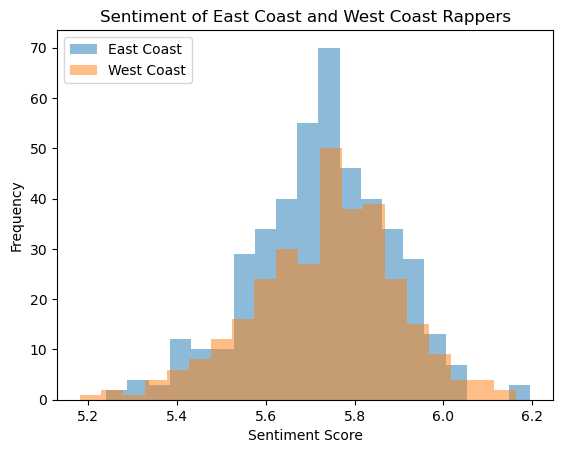

10 lowest sentiment scores
Cam%27ron None
DJ_E-Z_Rock None
GFMBryyce None
Knero_Lapa%C3%A9 None
Lil%27_Cease None
Lil%27_Kim None
Mr._Muthafuckin%27_eXquire None
Ol%27_Dirty_Bastard None
Red_Caf%C3%A9 None
Shaquille_O%27Neal None
10 highest sentiment scores
Foreknown_(rapper) 6.024999999999999
V._Rose 6.051867704280154
Sky_Blu_(rapper) 6.0596143958868955
KC_Montero 6.061728395061728
Roshon_Fegan 6.073565217391299
Dave_Free 6.096595744680857
MC_Yogi 6.106153846153848
D_Smoke 6.114497041420122
Fantasy_A 6.154786729857821
Emcee_N.I.C.E. 6.164415584415578


In [30]:
import pandas as pd

# Check if it has been correctly tokenized by printing the 20 most common tokens in the first dictionary of raw_east

def parse_labMT(file_content):
    lines = file_content.split('\n')
    labMT_dict = {}
    for line in lines[4:]:  # Skip the first two lines (header)
        parts = line.split('\t')
        if len(parts) > 2:  # Ensure there's a word and a happiness score
            word = parts[0]
            happiness_score = float(parts[2])
            labMT_dict[word] = happiness_score
    return labMT_dict

labMT_dict = parse_labMT(open('Data_Set_S1.txt').read())

# Compute the sentiment score for each rapper
def compute_sentiment(rapper_dict, labMT_dict):
    total_score = 0
    count = 0
    for token in rapper_dict['tokens']:
        if token in labMT_dict:
            total_score += labMT_dict[token]
            count += 1
    # Compute the average sentiment score
    if count != 0:
        return total_score / count
    else:
        return None  # Or some default value if there are no matches

for rapper in raw_east:
    rapper['sentiment_score'] = compute_sentiment(rapper, labMT_dict)

for rapper in raw_west:
    rapper['sentiment_score'] = compute_sentiment(rapper, labMT_dict)

# Print the 10 dictionaries with the highest and lowest sentiment score 

# Sort the list of dictionaries by sentiment score
sorted_east = sorted(raw_east, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))
sorted_west = sorted(raw_west, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))

# Print the 10 dictionaries with the highest and lowest sentiment score
# print('East Coast')
# print('10 lowest sentiment scores')
# for rapper in sorted_east[:10]:
#     print(rapper['name'], rapper['sentiment_score'])
# print('10 highest sentiment scores')
# for rapper in sorted_east[-10:]:
#     print(rapper['name'], rapper['sentiment_score'])

# print('West Coast')
# print('10 lowest sentiment scores')
# for rapper in sorted_west[:10]:
#     print(rapper['name'], rapper['sentiment_score'])
# print('10 highest sentiment scores')
# for rapper in sorted_west[-10:]:
#     print(rapper['name'], rapper['sentiment_score'])

# Plot the sentiment for each coast as a histogram

import matplotlib.pyplot as plt

# Create a list of sentiment scores for each coast
east_sentiment = [rapper['sentiment_score'] for rapper in raw_east if rapper['sentiment_score'] is not None]
west_sentiment = [rapper['sentiment_score'] for rapper in raw_west if rapper['sentiment_score'] is not None]

# Plot the histograms
plt.hist(east_sentiment, bins=20, alpha=0.5, label='East Coast')
plt.hist(west_sentiment, bins=20, alpha=0.5, label='West Coast')
plt.legend(loc='upper left')
plt.title('Sentiment of East Coast and West Coast Rappers')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Who are the top 10 most positive and negative rappers in overall

# Sort the list of dictionaries by sentiment score
sorted_east = sorted(raw_east, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))
sorted_west = sorted(raw_west, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))

sorted = sorted_east + sorted_west

# Print the 10 dictionaries with the highest and lowest sentiment score
print('10 lowest sentiment scores')
for rapper in sorted[:10]:
    print(rapper['name'], rapper['sentiment_score'])
print('10 highest sentiment scores')
for rapper in sorted[-10:]:
    print(rapper['name'], rapper['sentiment_score'])   






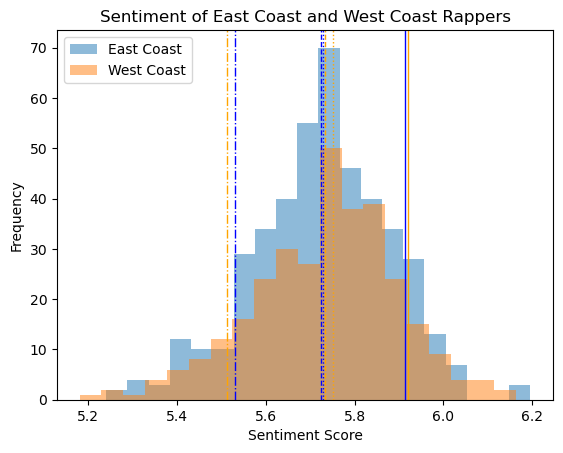

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate statistics for East Coast
east_mean = np.mean(east_sentiment)
east_median = np.median(east_sentiment)
east_10th = np.percentile(east_sentiment, 10)
east_90th = np.percentile(east_sentiment, 90)

# Calculate statistics for West Coast
west_mean = np.mean(west_sentiment)
west_median = np.median(west_sentiment)
west_10th = np.percentile(west_sentiment, 10)
west_90th = np.percentile(west_sentiment, 90)

# Plot histograms and annotate with statistics
plt.hist(east_sentiment, bins=20, alpha=0.5, label='East Coast')
plt.axvline(east_mean, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(east_median, color='blue', linestyle='dotted', linewidth=1)
plt.axvline(east_10th, color='blue', linestyle='dashdot', linewidth=1)
plt.axvline(east_90th, color='blue', linestyle='solid', linewidth=1)

plt.hist(west_sentiment, bins=20, alpha=0.5, label='West Coast')
plt.axvline(west_mean, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(west_median, color='orange', linestyle='dotted', linewidth=1)
plt.axvline(west_10th, color='orange', linestyle='dashdot', linewidth=1)
plt.axvline(west_90th, color='orange', linestyle='solid', linewidth=1)

plt.legend(loc='upper left')
plt.title('Sentiment of East Coast and West Coast Rappers')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [32]:
def label_shuffling(sentiments, actual_group_size, num_iterations=1000):
    observed_mean = np.mean(sentiments[:actual_group_size])
    shuffled_means = []

    for _ in range(num_iterations):
        np.random.shuffle(sentiments)
        shuffled_mean = np.mean(sentiments[:actual_group_size])
        shuffled_means.append(shuffled_mean)

    return observed_mean, shuffled_means

# Combine sentiments from both coasts for shuffling
combined_sentiments = east_sentiment + west_sentiment

observed_mean, shuffled_means = label_shuffling(combined_sentiments, len(west_sentiment))

# Determine how many shuffled means are less than the observed mean
count_less_than_observed = sum(1 for mean in shuffled_means if mean < observed_mean)

# Determine how many shuffled means are greater than the observed mean
count_greater_than_observed = sum(1 for mean in shuffled_means if mean > observed_mean)

# Print results
print(f"Number of times shuffled mean < observed mean: {count_less_than_observed}")
print(f"Number of times shuffled mean > observed mean: {count_greater_than_observed}")


Number of times shuffled mean < observed mean: 119
Number of times shuffled mean > observed mean: 881


# Appendix

In [33]:
import urllib.request
import re
import networkx as nx
import pandas as pd
import os
import json
import networkx as nx

# Fetch the names from the current wikipedia category pages for West Coast and East Cost Hip Hop Musicians
def fetch_current_names():
    urlWest = 'https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians'
    response = urllib.request.urlopen(urlWest)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    westNames = re.findall('href="/wiki/([^:#"]+)"', textWest)
    urlWest = 'https://en.wikipedia.org/w/index.php?title=Category:West_Coast_hip_hop_musicians&pagefrom=McFedries%2C+Trevor%0ATrevor+McFedries#mw-pages'
    response = urllib.request.urlopen(urlWest)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    westNames2 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    westNames = westNames[17:] + westNames2[17:]


    urlEast = 'https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textEast = data.decode('utf-8')
    eastNames = re.findall('href="/wiki/([^:#"]+)"', textEast)
    urlEast = 'https://en.wikipedia.org/w/index.php?title=Category:East_Coast_hip_hop_musicians&pagefrom=Junglepussy%0AJunglepussy#mw-pages'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    eastNames2 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    urlEast = 'https://en.wikipedia.org/w/index.php?title=Category:East_Coast_hip_hop_musicians&pagefrom=Stezo#mw-pages'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    eastNames3 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    eastNames = eastNames[15:] + eastNames2[15:] + eastNames3[15:]
    
    names = eastNames + westNames
    
    # Save the combined list of both east and west in a .txt file called "rappers"
    with open('rappers.txt', 'w') as f:
        for item in westNames:
            f.write("%s\n" % item)
        for item in eastNames:
            f.write("%s\n" % item)

    # Save the list of east in a .txt file called "rappersEast"
    with open('rappersEast.txt', 'w') as f:
        for item in eastNames:
            f.write("%s\n" % item)

    # Save the list of west in a .txt file called "rappersWest"
    with open('rappersWest.txt', 'w') as f:
        for item in westNames:
            f.write("%s\n" % item)

    return names, eastNames, westNames

def fetch_wiki_html(rappers, coast):

    if coast == "east":
        directory = 'htmlEast'
    elif coast == "west":
        directory = 'htmlWest'
    else:
        raise ValueError("Invalid coast value. Use either 'east' or 'west'.")


    for rapper in rappers:
        url = 'https://en.wikipedia.org/wiki/' + rapper
        response = urllib.request.urlopen(url)
        data = response.read()      # a `bytes` object
        text = data.decode('utf-8')
        with open(f'{directory}/{rapper}.txt', 'w', encoding="utf-8") as f:
            f.write(text)

def fetch_wiki_texts(rappers, coast):
    # Base URL for the Wikipedia API
    base_url = 'https://en.wikipedia.org/w/api.php'
    
    # Determine the directory based on the coast
    if coast == "east":
        directory = 'textsEast'
    elif coast == "west":
        directory = 'textsWest'
    else:
        raise ValueError("Invalid coast value. Use either 'east' or 'west'.")

    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Loop through the rapper names
    for rapper in rappers:
        # Prepare parameters for the API request
        params = {
            "action": "query",
            "prop": "extracts",
            "exlimit": "1",
            "explaintext": "1",
            "format": "json",
            "titles": rapper
        }

        # Construct the full URL
        api_url = base_url + "?" + urllib.parse.urlencode(params)
        
        # Make the request
        response = urllib.request.urlopen(api_url)
        data = json.loads(response.read().decode('utf-8'))
        
        # Parse the JSON data to get the 'extract' key
        pages = data.get("query", {}).get("pages", {})
        for page_id, page_data in pages.items():
            content = page_data.get("extract", "")
            # Save the content to the appropriate .txt file in the designated directory
            with open(f'{directory}/{rapper}.txt', 'w', encoding="utf-8") as f:
                f.write(content)
            if (content == ""):
                print(f"Could not find content for {rapper}")

### Outcomment this to get the current data ###
names, eastNames, westNames = fetch_current_names()
fetch_wiki_html(eastNames, "east")
fetch_wiki_html(westNames, "west")
fetch_wiki_texts(eastNames, "east")
fetch_wiki_texts(westNames, "west")


KeyboardInterrupt: 

In [ ]:
# Count the number of files in wikisEast and wikisWest combined
import os
count1 = 0
count2 = 0
for file in os.listdir("wikisEast"):
    count1 += 1
for file in os.listdir("wikisWest"):
    count2 += 1

print(count1)
print(count2)
print(count1 + count2)

# Count the number of files in htmlEast and htmlWest 

count1 = 0
count2 = 0
for file in os.listdir("htmlEast"):
    count1 += 1
for file in os.listdir("htmlWest"):
    count2 += 1

print(count1)
print(count2)
print(count1 + count2)

# Count the number of lines in rappersEast.txt and rappersWest.txt

count1 = 0
count2 = 0

with open("rappersEast.txt", "r") as f:
    for line in f:
        count1 += 1
with open("rappersWest.txt", "r") as f:
    for line in f:
        count2 += 1

print(count1)
print(count2)
print(count1 + count2)

# Compare the filenames in wikisEast and wikisWest to the names in rappersEast.txt and rappersWest.txt and print the names that are not in any of the folders

import os
import re

# Get the names of the files in wikisEast and wikisWest
wikisEast = []
wikisWest = []
for file in os.listdir("wikisEast"):
    # Remove the .txt extension from the file name
    file = re.sub(".txt", "", file)
    wikisEast.append(file)
for file in os.listdir("wikisWest"):
    # Remove the .txt extension from the file name
    file = re.sub(".txt", "", file)
    wikisWest.append(file)

# Get the names of the rappers in rappersEast.txt and rappersWest.txt
rappersEast = []
rappersWest = []
with open("rappersEast.txt", "r") as f:
    for line in f:
        rappersEast.append(line.strip())
with open("rappersWest.txt", "r") as f:
    for line in f:
        rappersWest.append(line.strip())

# Compare the names of the files in wikisEast and wikisWest to the names in rappersEast.txt and rappersWest.txt
# Print the names that are not in any of the folders
for rapper in rappersEast:
    if rapper not in wikisEast:
        print(rapper)
for rapper in rappersWest:
    if rapper not in wikisWest:
        print(rapper)



450
354
804
450
354
804
450
354
804
